# Control time series for valve

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [40]:
def valve_control_series(T, max_rate, max_voltage, dt):
    """
    Create a valve control time series.

    :param T: Total length of valve control series in seconds.
    :param max_rate: Maximum rate of change of valve in volts per second.
    :param dt: Time interval between voltage steps.
    """
    # Arduino maximum discrete output value. PWM maximum value.
    max_output = 255

    # Volts per pwc output.
    V_steps = max_voltage / max_output
    
    # Time steps.
    t = np.arange(0, T, dt)
    Nt = len(t)

    # Output in Arduino PWC units.
    output = np.zeros(Nt)

    # Convert max_rate in volts/sec to max change per time step in volts
    max_step_change = max_rate * dt / V_steps
    print(max_step_change)

    for i in range(1, Nt):
        prev_value = output[i - 1]
        min_val = max(prev_value - max_step_change, 0)
        max_val = min(prev_value + max_step_change, max_output)
        output[i] = round(np.random.uniform(min_val, max_val))

    return t, output

5.1
[ 0.  2.  1.  6.  8.  5.  2.  2.  1.  4.  2.  1.  2.  1.  1.  5.  8.  6.
  5.  2.  5.  4.  4.  9. 13. 13. 16. 13.  9.  9.  9.  7.  6.  9.  5.  7.
 10. 13. 14. 11. 16. 19. 21. 19. 15. 18. 21. 20. 22. 25. 26. 21. 21. 19.
 23. 23. 27. 23. 23. 23. 21. 17. 19. 18. 14. 13. 17. 13. 14. 12. 11. 10.
 11.  9. 11. 14. 11. 12.  9.  6.  2.  6.  4.  5.  0.  2.  5.  3.  4.  1.
  3.  1.  1.  3.  8. 13.  8.  6.  5.  9. 13. 15. 20. 22. 20. 17. 15. 12.
 11. 15. 16. 18. 14. 13. 17. 20. 21. 16. 14. 10. 15. 13. 11. 16. 19. 20.
 20. 15. 14. 18. 18. 21. 26. 28. 28. 26. 29. 29. 25. 26. 22. 18. 19. 14.
 18. 22. 20. 23. 24. 24. 24. 21. 22. 22. 25. 23. 23. 28. 26. 27. 32. 36.
 35. 34. 36. 41. 44. 47. 46. 43. 38. 42. 37. 35. 33. 33. 29. 34. 36. 40.
 36. 33. 32. 36. 38. 37. 33. 29. 33. 31. 36. 37. 40. 38. 39. 41. 41. 45.
 41. 45. 47. 49. 45. 41. 42. 37. 36. 38. 38. 34. 29. 34. 30. 33. 38. 42.
 39. 44. 46. 51. 55. 53. 57. 62. 62. 62. 60. 59. 57. 55. 58. 61. 58. 54.
 54. 59. 57. 54. 59. 55. 60. 61. 64. 59. 63. 67

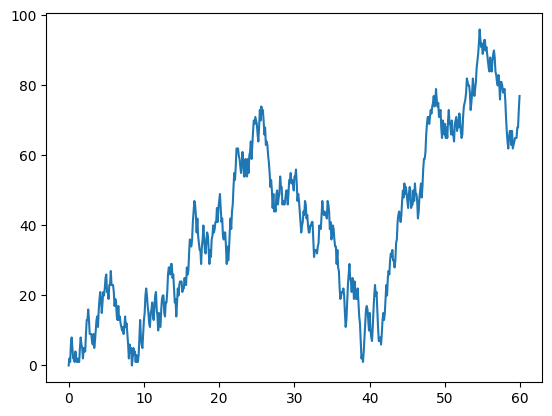

In [42]:
T = 60
dt = 0.1
max_voltage = 12
max_rate = max_voltage / 5

t, ctrl = valve_control_series(T, max_rate, max_voltage, dt)
print(ctrl)

plt.plot(t, ctrl)

51.0


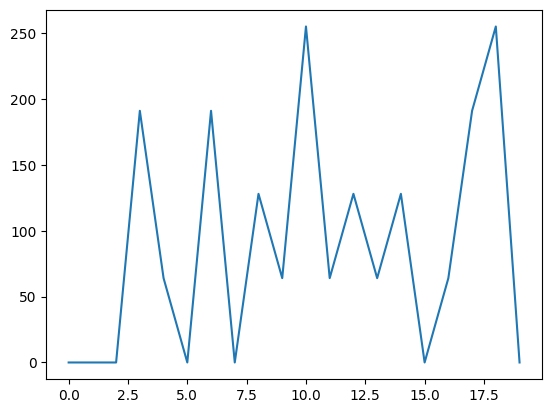

analogWrite(valvePin, 0.0);
delay(2000.0); // Time at value.
analogWrite(valvePin, 0.0);
delay(2000.0); // Time at value.
analogWrite(valvePin, 191.0);
delay(8000.0); // Time at value.
analogWrite(valvePin, 64.0);
delay(2000.0); // Time at value.
analogWrite(valvePin, 0.0);
delay(2000.0); // Time at value.
analogWrite(valvePin, 191.0);
delay(8000.0); // Time at value.
analogWrite(valvePin, 0.0);
delay(2000.0); // Time at value.
analogWrite(valvePin, 128.0);
delay(6000.0); // Time at value.
analogWrite(valvePin, 64.0);
delay(2000.0); // Time at value.
analogWrite(valvePin, 255.0);
delay(8000.0); // Time at value.
analogWrite(valvePin, 64.0);
delay(2000.0); // Time at value.
analogWrite(valvePin, 128.0);
delay(4000.0); // Time at value.
analogWrite(valvePin, 64.0);
delay(2000.0); // Time at value.
analogWrite(valvePin, 128.0);
delay(4000.0); // Time at value.
analogWrite(valvePin, 0.0);
delay(2000.0); // Time at value.
analogWrite(valvePin, 64.0);
delay(4000.0); // Time at value.
analogW

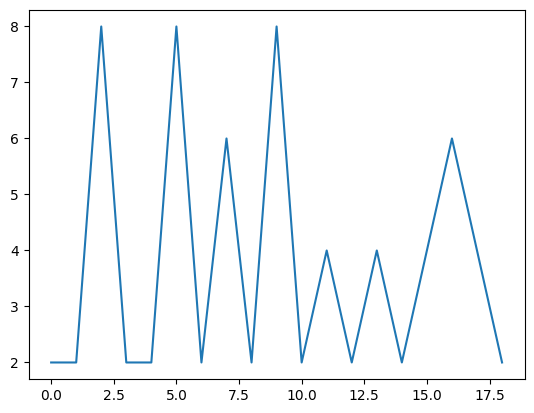

In [67]:
n_increments = 5
n_steps = 20
input_sequence = np.random.choice(n_increments, size=n_steps)

# Start and end with closed valve.
input_sequence[0] = 0
input_sequence[-1] = 0


t_full_open = 5
max_voltage = 12
max_output = 255

max_rate = max_voltage / t_full_open
max_rate_output = max_output / t_full_open
print(max_rate_output)
v_output = max_output / max_voltage

# Output sequence values.
output_sequence = np.round(input_sequence * max_output / (n_increments - 1))

# Corresponding times based on max rate of change.
t_wait = np.zeros(n_steps - 1)
for i in range(n_steps - 1):
    t_wait[i] = np.ceil(max(1, (output_sequence[i+1] - output_sequence[i]) / max_rate_output)) * 2

t = np.cumsum(t_wait)

plt.plot(output_sequence)
plt.show()

plt.plot(t_wait)

for i in range(1, n_steps):
    print(f'analogWrite(valvePin, {output_sequence[i]});')
    print(f'delay({t_wait[i-1]*1000}); // Time at value.')

## Series of impulses

[160 240 219 215  88 161 107 134 218 226 247 203 159 213 202 189  98 167
 174   0]
[3137 4706 4294 4216 1725 3157 2098 2627 4275 4431 4843 3980 3118 4176
 3961 3706 1922 3275 3412]


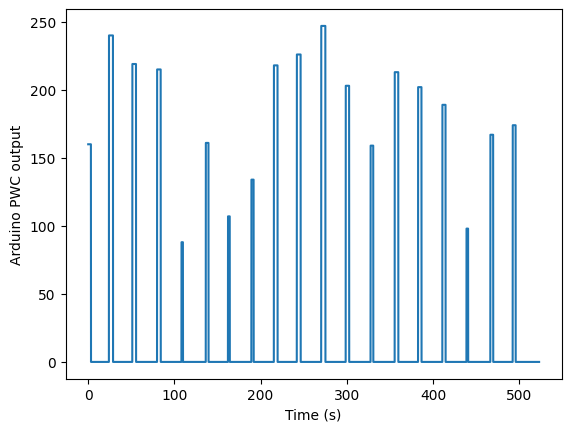

analogWrite(valvePin, 160);
delay(3137); // Time at value.
analogWrite(valvePin, 0);
delay(24000); // Time at value.
analogWrite(valvePin, 240);
delay(4706); // Time at value.
analogWrite(valvePin, 0);
delay(24000); // Time at value.
analogWrite(valvePin, 219);
delay(4294); // Time at value.
analogWrite(valvePin, 0);
delay(24000); // Time at value.
analogWrite(valvePin, 215);
delay(4216); // Time at value.
analogWrite(valvePin, 0);
delay(24000); // Time at value.
analogWrite(valvePin, 88);
delay(1725); // Time at value.
analogWrite(valvePin, 0);
delay(24000); // Time at value.
analogWrite(valvePin, 161);
delay(3157); // Time at value.
analogWrite(valvePin, 0);
delay(24000); // Time at value.
analogWrite(valvePin, 107);
delay(2098); // Time at value.
analogWrite(valvePin, 0);
delay(24000); // Time at value.
analogWrite(valvePin, 134);
delay(2627); // Time at value.
analogWrite(valvePin, 0);
delay(24000); // Time at value.
analogWrite(valvePin, 218);
delay(4275); // Time at value.
analog

In [7]:
# Set the random seed.
np.random.seed(12)

n_increments = 255 + 1
n_steps = 20
ctrl_sequence = np.random.choice(np.arange(n_increments // 3, n_increments), size=n_steps)

# Waiting time between pulses.
t_off = 24000 # ms

# Start and end with closed valve.
ctrl_sequence[-1] = 0

# Input parameters.
t_full_open = 5 # Time for valve to fully open.
max_voltage = 12 # Maximum valve voltage.
max_output = 255 # Maximum PWM output from Arduino.

# Opening rate parameters.
max_rate = max_voltage / t_full_open # Maximum voltage change per second. 
max_rate_output = max_output / t_full_open # Maximum PWC output change per second.
v_output = max_output / max_voltage # Ratio of PWC output to voltage. [PWC steps / V]

# Amount of time where PWC signal is sent to valve, t_on.
t_on = np.zeros(n_steps - 1)
for i in range(n_steps - 1):
    # t_on[i] = np.ceil(max(1, (ctrl_sequence[i+1] - ctrl_sequence[i]) / max_rate_output)) * 2
    t_on[i] = round(ctrl_sequence[i] / max_rate_output * 1000)
t_on = t_on.astype(int)

print(ctrl_sequence)
print(t_on)

# Create time series for plotting.
Nt = int(np.sum(t_on) + t_off * len(t_on))
t = np.arange(Nt) # Time in ms.
X = np.zeros(Nt) # Control sequence.
X[np.arange(t_on[0])] = ctrl_sequence[0]
for i in range(1, len(t_on)):
    t_on_ar = np.arange(t_on[i]) + np.sum(t_on[:i-1]) + t_off * i
    X[t_on_ar] = ctrl_sequence[i]

plt.plot(t / 1000, X)
plt.xlabel('Time (s)')
plt.ylabel('Arduino PWC output')
plt.show()

for i in range(n_steps-1):
    print(f'analogWrite(valvePin, {ctrl_sequence[i]});')
    print(f'delay({t_on[i]}); // Time at value.')
    print(f'analogWrite(valvePin, {0});')
    print(f'delay({t_off}); // Time at value.')